# PREDICTION WITH XGBRegressor

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error 
from xgboost import XGBRegressor
 

In [4]:
# read dataset may2023
df = pd.read_pickle("../../data/20230319_RTU_Dataset_PPC-Lab/combined_may2023.pkl")  

In [6]:
df

,MEM_USAGE,CPU_USAGE,PS1_V,TEMP
0,35.555417,27.343750,5.435294,28.687
1,35.555417,6.367041,5.435294,28.687
2,35.555417,7.142857,5.435294,28.687
3,35.555417,27.306273,5.435294,28.687
4,35.555417,5.639098,5.435294,28.687
...,...,...,...,...
3798,25.962425,8.396947,5.383530,29.562
3799,25.962425,6.766917,5.383530,29.562
3800,25.962425,6.000000,5.383530,29.562
3801,25.962425,8.045977,5.383530,29.562


In [7]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
training_size = int(len(df) * 0.7)
validation_size = int(len(df) * 0.8)

x_train = [[i] for i in df["TEMP"]][:training_size]
y_train = [i for i in df["CPU_USAGE"]][:training_size]

x_val = [[i] for i in df["TEMP"]][training_size:validation_size]
y_val = [i for i in df["CPU_USAGE"]][training_size:validation_size]

x_test = [[i] for i in df["TEMP"]][validation_size:]
y_test = [[i] for i in df["CPU_USAGE"]][validation_size:]

len(x_test)


747

In [25]:
# Training
regressor = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

In [26]:
regressor.fit(
    x_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(x_train, y_train), (x_val, y_val)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-rmse:16.30337	validation_1-rmse:17.70207
[1]	validation_0-rmse:15.42617	validation_1-rmse:16.92710
[2]	validation_0-rmse:14.67558	validation_1-rmse:16.25013
[3]	validation_0-rmse:14.04135	validation_1-rmse:15.65830
[4]	validation_0-rmse:13.51214	validation_1-rmse:15.16591
[5]	validation_0-rmse:13.05991	validation_1-rmse:14.77737
[6]	validation_0-rmse:12.68998	validation_1-rmse:14.43652
[7]	validation_0-rmse:12.37387	validation_1-rmse:14.15391
[8]	validation_0-rmse:12.11370	validation_1-rmse:13.91361
[9]	validation_0-rmse:11.89484	validation_1-rmse:13.71257
[10]	validation_0-rmse:11.71473	validation_1-rmse:13.55021
[11]	validation_0-rmse:11.57144	validation_1-rmse:13.41213
[12]	validation_0-rmse:11.45046	validation_1-rmse:13.29746
[13]	validation_0-rmse:11.35357	validation_1-rmse:13.21299
[14]	validation_0-rmse:11.26985	validation_1-rmse:13.12962
[15]	validation_0-rmse:11.20182	validation_1-rmse:13.07147
[16]	validation_0-rmse:11.15427	validation_1-rmse:13.02788
[17]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [28]:
Y_pred = regressor.predict(x_test)

In [29]:
print(mean_absolute_percentage_error(list(Y_pred), y_test))

66.18822223099487


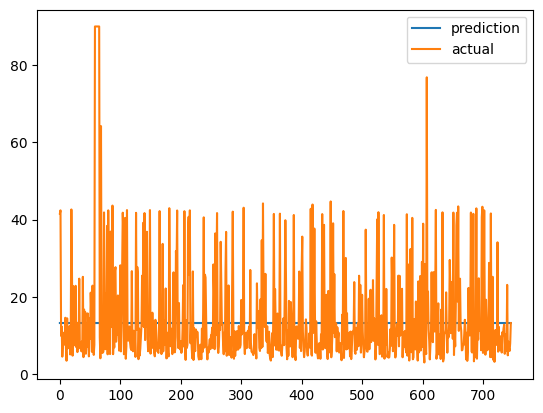

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred, label="prediction")
plt.plot(x, y_actual, label="actual")
plt.legend()
plt.show()

In [31]:
training_size = int(len(df) * 0.7)
validation_size = int(len(df) * 0.8)

x_train = [[i] for i in df["CPU_USAGE"]][:training_size]
y_train = [i for i in df["TEMP"]][:training_size]

x_val = [[i] for i in df["CPU_USAGE"]][training_size:validation_size]
y_val = [i for i in df["TEMP"]][training_size:validation_size]

x_test = [[i] for i in df["CPU_USAGE"]][validation_size:]
y_test = [[i] for i in df["TEMP"]][validation_size:]

In [32]:
# Training
regressor = XGBRegressor(
    max_depth=10,
    n_estimators=1000,
    min_child_weight=0.5, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.1,
    seed=42)

regressor.fit(
    x_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(x_train, y_train), (x_val, y_val)], 
    verbose=True, 
    early_stopping_rounds = 20)

[0]	validation_0-rmse:22.08233	validation_1-rmse:24.63473
[1]	validation_0-rmse:19.92003	validation_1-rmse:22.48453
[2]	validation_0-rmse:17.97698	validation_1-rmse:20.55397
[3]	validation_0-rmse:16.23205	validation_1-rmse:18.82178
[4]	validation_0-rmse:14.66778	validation_1-rmse:17.27032
[5]	validation_0-rmse:13.26756	validation_1-rmse:15.88274
[6]	validation_0-rmse:12.01574	validation_1-rmse:14.65642
[7]	validation_0-rmse:10.89029	validation_1-rmse:13.55449
[8]	validation_0-rmse:9.88926	validation_1-rmse:12.56441
[9]	validation_0-rmse:8.99528	validation_1-rmse:11.69038
[10]	validation_0-rmse:8.20079	validation_1-rmse:10.91656
[11]	validation_0-rmse:7.49468	validation_1-rmse:10.21608
[12]	validation_0-rmse:6.87242	validation_1-rmse:9.60787
[13]	validation_0-rmse:6.32195	validation_1-rmse:9.06987
[14]	validation_0-rmse:5.83451	validation_1-rmse:8.59007
[15]	validation_0-rmse:5.40613	validation_1-rmse:8.15505
[16]	validation_0-rmse:5.03438	validation_1-rmse:7.77932
[17]	validation_0-rms

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=0.5, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [33]:
Y_pred = regressor.predict(x_test)

In [34]:
print(mean_absolute_percentage_error(Y_pred, y_test))

19.84582274749494


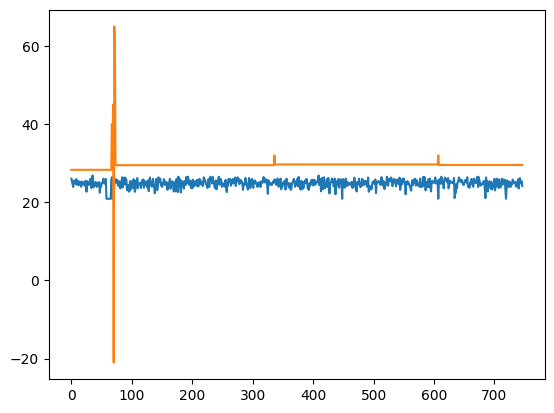

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = range(len(list(Y_pred)))
y_pred = list(Y_pred)
y_actual = y_test

plt.plot(x, y_pred)
plt.plot(x, y_actual)
plt.show()

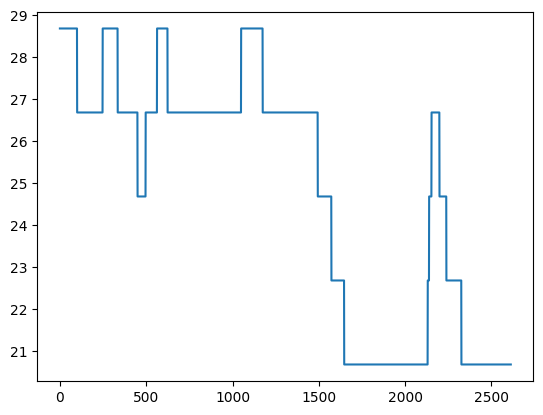

In [36]:
x = range(len(list(y_train)))
y_pred = list(y_train)

plt.plot(x, y_pred)
plt.show()